Fifa dataset contains many interesting information about football players. Many of the information
are usable like statistics for defense, attack, or speed. Thanks to its variety there is very good opportunity to impove data wrangling and data visualisation skills. For this specyfic dataset ML models could be implemented sucessfully but I decided to restricts to EDA analysis and finding insights. Therefore I will make attempt to answer some questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read and split data

In [2]:
dataset = pd.read_csv("/kaggle/input/fifa-22-complete-player-dataset/players_22.csv", low_memory=False)

* We will make split of dataset for numerical columns dataset and text columns dataset and concatenate id column to string dataset

In [3]:
_id = dataset["sofifa_id"].astype(str)
dataset_num, dataset_str = dataset.select_dtypes(include="number"), dataset.select_dtypes(include="object")
dataset_str = pd.concat([dataset_str, _id], axis = 1)
del dataset

In [4]:
dataset_str["sofifa_id"].dtype

dtype('O')

# Locate columns to be dropped within string columns

In [5]:
string_columns_drop = []

In [6]:
dataset_str["player_url"][0]

'https://sofifa.com/player/158023/lionel-messi/220002'

* player url contains many more information about player, for example his matches history which could be used in future analysis but present dataset is sufficient

In [7]:
string_columns_drop.extend([col for col in dataset_str.columns if "url" in col])

* does long_name is needed when we have short name?

In [8]:
dataset_str["short_name"].isnull().value_counts()

short_name
False    19239
Name: count, dtype: int64

In [9]:
dataset_str["long_name"].isnull().value_counts()

long_name
False    19239
Name: count, dtype: int64

* we can drop one of thease columns later

In [10]:
string_columns_drop.append("long_name")

* player position contains many positions in one cell, analysis with all thease positions may provide more detailed analysis but for this analysis one position for player is enought, hence we will split this column and keep only first (prob main position)

In [11]:
dataset_str["player_positions"] = dataset_str["player_positions"].str.split(', ',expand=True)[0]

* there are few more columns related to position

In [12]:
positions_variables = [col for col in dataset_str.columns if "position" in col and "positioning" not in col]
positions_variables

['player_positions', 'club_position', 'nation_position']

* lets find out whether club/nation and player positions are needed to be separated 

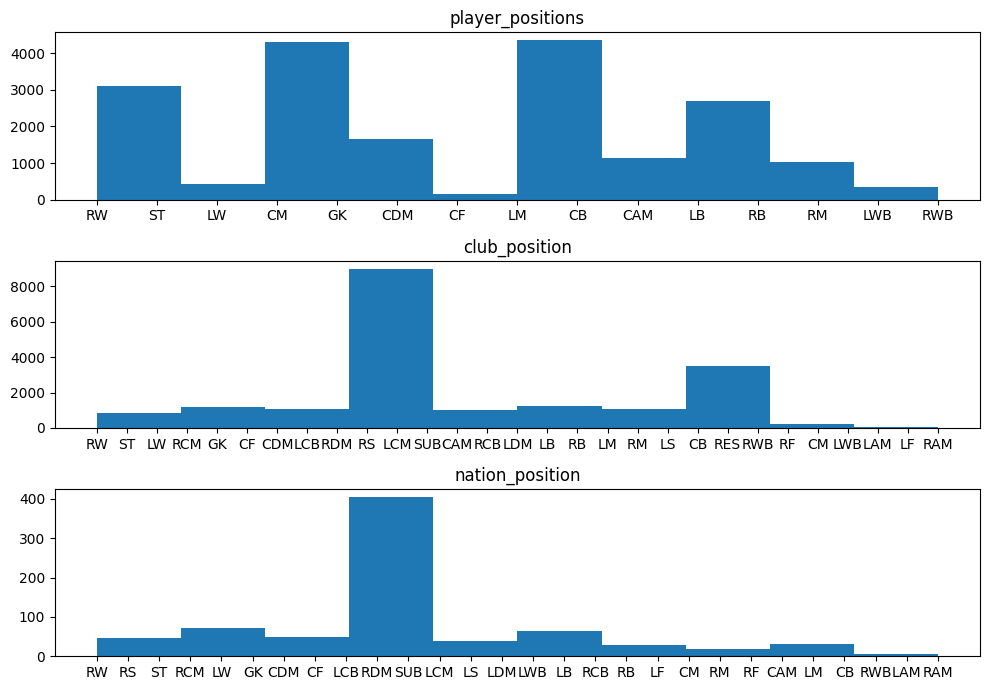

In [13]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,7))

for _ax, _pos in enumerate(positions_variables):
    dataset_str[_pos].hist(ax=axes[_ax], bins=10)
    axes[_ax].set_title(_pos)
    axes[_ax].grid(False)

plt.tight_layout()
plt.show()

* distribution of club and nation positions are relatively same, but player position is divided more properly, hence I will keep only player position

In [14]:
string_columns_drop.append("club_position")
string_columns_drop.append("nation_position")

* variables player_traits and player_tags have too many categories so they are completly useless in further analysis

In [15]:
string_columns_drop.append("player_tags")
string_columns_drop.append("player_traits")
string_columns_drop.append("real_face")

* dob and age corresponds to each other so dob will be removed

In [16]:
string_columns_drop.append("dob")

In [17]:
dataset_str["body_type"].value_counts()

body_type
Normal (170-185)    6685
Normal (185+)       4236
Lean (170-185)      4086
Lean (185+)         1938
Normal (170-)        669
Stocky (170-185)     560
Lean (170-)          477
Stocky (185+)        355
Unique               136
Stocky (170-)         97
Name: count, dtype: int64

* since body type should indicates player position we will keep this variable

In [18]:
pd.set_option('display.max_columns', 100)
start_index = dataset_str.columns.get_loc("ls")
end_index = dataset_str.columns.get_loc("gk") + 1
dataset_str.iloc[:, start_index : end_index ].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


* this analysis includes only basic stats of player, therefore all advanced statistcs will be droped

In [19]:
dataset_str.drop(dataset_str.iloc[ : , start_index : end_index], axis = "columns", inplace = True)

# Drop useless string attributes

In [20]:
dataset_str.drop(columns=string_columns_drop, inplace = True)

# Locate columns to be dropped within numerical columns

In [21]:
number_columns_drop = []

* nation team id / nationality name and nationality id are corresponding so keep nationality name

In [22]:
number_columns_drop.extend(["nationality_id", "nation_team_id"])

* dataset_num["club_team_id"] and dataset_str["club_name"] corresponds to each other so I will remove club team id

In [23]:
number_columns_drop.append("club_team_id")

* lets find out which advances statistcs have interesting distributions

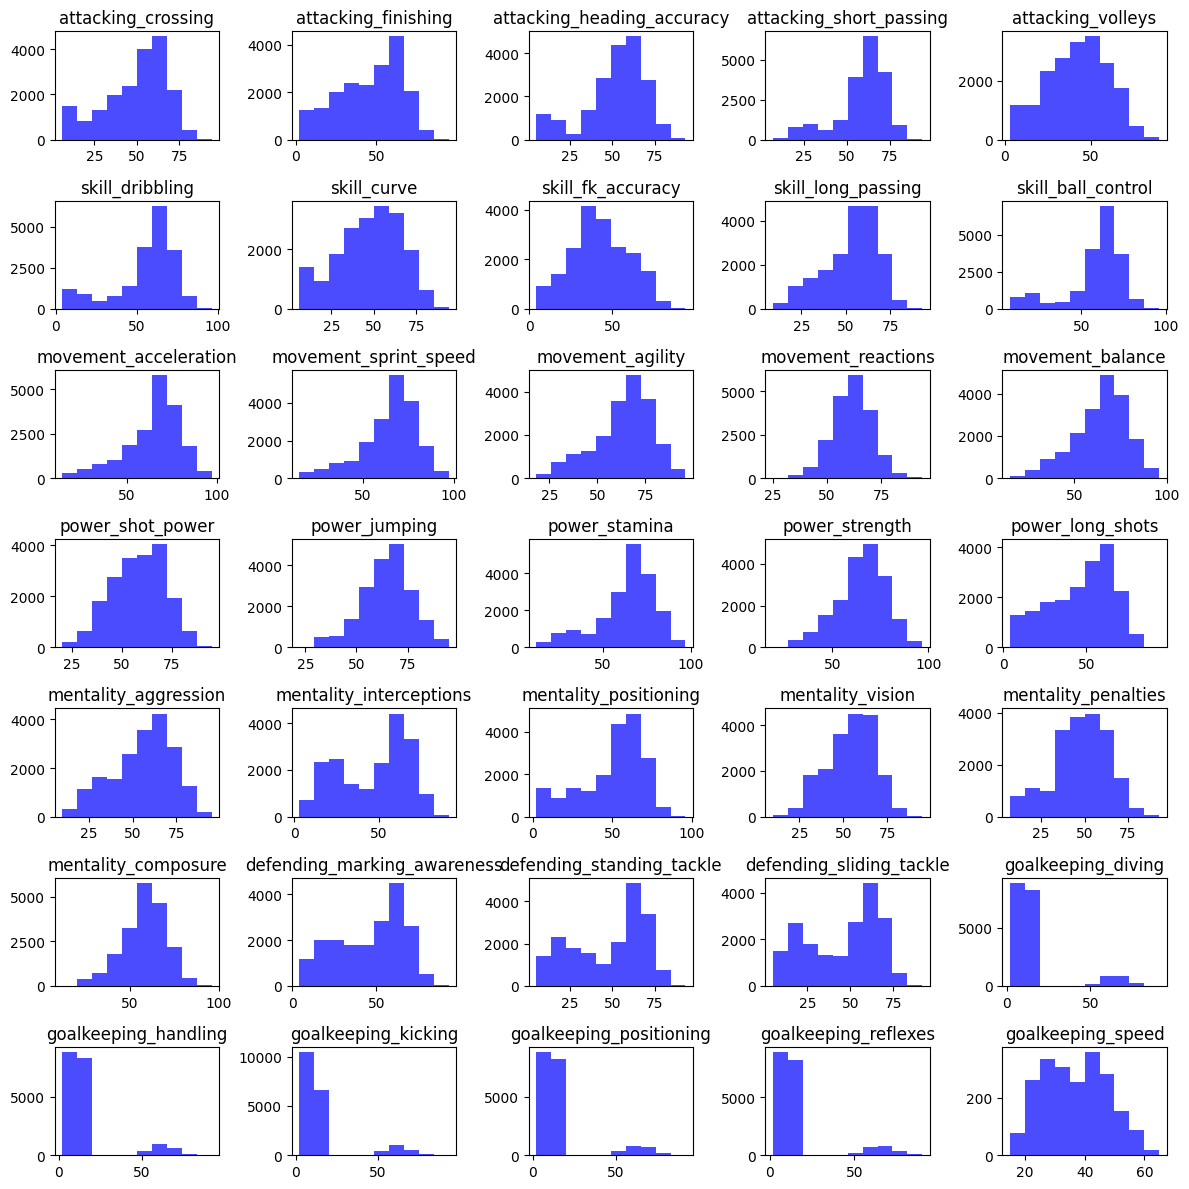

In [24]:
start_index = dataset_num.columns.get_loc("attacking_crossing")
end_index = dataset_num.columns.get_loc("goalkeeping_speed") + 1

advanced_num_data = dataset_num.iloc[:, start_index : end_index]

rows = advanced_num_data.shape[1] // 5
cols = advanced_num_data.shape[1] // 7
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

for i, _col in enumerate(advanced_num_data.columns):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    ax.hist(advanced_num_data[_col], bins=10, alpha=0.7, color='blue')
    ax.set_title(f'{_col}')


plt.tight_layout()
plt.show()


* defending standing/sliding tackle have bimodal distribution which means we observe 2 typical values, I will keep one of thease variable 

In [25]:
defending_sliding_tackle = dataset_num["defending_sliding_tackle"]

# Dropping useless numerical variables

In [26]:
dataset_num.drop(dataset_num.iloc[:, start_index : end_index], axis="columns", inplace = True)

In [27]:
dataset_num.drop(columns=number_columns_drop, inplace = True)

* concatenate numerical_dataset with series defending_sliding_tackle

In [28]:
dataset_num = pd.concat([dataset_num, defending_sliding_tackle], axis=1)

* Euro salary, release clause, value converted int milions and thousands and rename

In [29]:
dataset_num.rename(inplace=True, columns={"value_eur" : "value_mln_eur", "wage_eur" : "wage_k_eur", 
                                          "release_clause_eur" : "release_clause_mln_eur"})

dataset_num["release_clause_mln_eur"] = dataset_num["release_clause_mln_eur"] / 1000000
dataset_num["value_mln_eur"] = dataset_num["value_mln_eur"] / 1000000
dataset_num["wage_k_eur"] = dataset_num["wage_k_eur"] / 1000

* rename weak_foot because we have preferred foot which indicates body statistics and weak_foot which belongs to skills table

In [30]:
dataset_num.rename(columns={"weak_foot" : "weak_foot_points"}, inplace = True)

# Final concatenate of numerical and text datasets

In [31]:
dataset_num.head()

,sofifa_id,overall,potential,value_mln_eur,wage_k_eur,age,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,nation_jersey_number,weak_foot_points,skill_moves,international_reputation,release_clause_mln_eur,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle
0,158023,93,93,78.0,320.0,34,170,72,1.0,30.0,2023.0,10.0,4,4,5,144.3,85.0,92.0,91.0,95.0,34.0,65.0,24
1,188545,92,92,119.5,270.0,32,185,81,1.0,9.0,2023.0,9.0,4,4,5,197.2,78.0,92.0,79.0,86.0,44.0,82.0,19
2,20801,91,91,45.0,270.0,36,187,83,1.0,7.0,2023.0,7.0,4,5,5,83.3,87.0,94.0,80.0,88.0,34.0,75.0,24
3,190871,91,91,129.0,270.0,29,175,68,1.0,10.0,2025.0,NaN,5,5,5,238.7,91.0,83.0,86.0,94.0,37.0,63.0,29
4,192985,91,91,125.5,350.0,30,181,70,1.0,17.0,2025.0,7.0,5,4,4,232.2,76.0,86.0,93.0,88.0,64.0,78.0,53


In [32]:
dataset_str.head()

,short_name,player_positions,club_name,league_name,club_loaned_from,club_joined,nationality_name,preferred_foot,work_rate,body_type,sofifa_id
0,L. Messi,RW,Paris Saint-Germain,French Ligue 1,NaN,2021-08-10,Argentina,Left,Medium/Low,Unique,158023
1,R. Lewandowski,ST,FC Bayern München,German 1. Bundesliga,NaN,2014-07-01,Poland,Right,High/Medium,Unique,188545
2,Cristiano Ronaldo,ST,Manchester United,English Premier League,NaN,2021-08-27,Portugal,Right,High/Low,Unique,20801
3,Neymar Jr,LW,Paris Saint-Germain,French Ligue 1,NaN,2017-08-03,Brazil,Right,High/Medium,Unique,190871
4,K. De Bruyne,CM,Manchester City,English Premier League,NaN,2015-08-30,Belgium,Right,High/High,Unique,192985


# Splitting into more descriptive tables
* club - sofifa_id, club_name, league_name, club_loaned_from, club_joined, league_level, club_jersey_number, club_contract_valid_until, player_positions
* skills - sofifa_id, overall, potential, work_rate, pace, shooting, passing, dribbling, defending, physic, defending_sliding_tackle
* body_stats - sofifa_id, preferred_foot, body_type, age, height_cm, weight_kg
* player_finance - sofifa_id, value_mln_eur, wage_k_eur, release_clause_mln_eur
* player_international - international_reputation, nation_jersey_number, nationality_name
* name - soffifa_id, short_name

In [33]:
club_str = dataset_str[["sofifa_id", "club_name", "league_name", "club_loaned_from", "club_joined","player_positions"]]
club_num = dataset_num[["league_level", "club_jersey_number", "club_contract_valid_until"]]
club = pd.concat([club_str, club_num], axis=1)
club.head()

,sofifa_id,club_name,league_name,club_loaned_from,club_joined,player_positions,league_level,club_jersey_number,club_contract_valid_until
0,158023,Paris Saint-Germain,French Ligue 1,NaN,2021-08-10,RW,1.0,30.0,2023.0
1,188545,FC Bayern München,German 1. Bundesliga,NaN,2014-07-01,ST,1.0,9.0,2023.0
2,20801,Manchester United,English Premier League,NaN,2021-08-27,ST,1.0,7.0,2023.0
3,190871,Paris Saint-Germain,French Ligue 1,NaN,2017-08-03,LW,1.0,10.0,2025.0
4,192985,Manchester City,English Premier League,NaN,2015-08-30,CM,1.0,17.0,2025.0


In [34]:
skills_str = dataset_str[["sofifa_id", "work_rate"]]
skills_num = dataset_num[["overall", "potential", "pace", "shooting", "passing", "dribbling", "defending", "physic", "defending_sliding_tackle", 
                          "skill_moves", "weak_foot_points"]]
skills = pd.concat([skills_str, skills_num], axis=1)
skills.head()

,sofifa_id,work_rate,overall,potential,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle,skill_moves,weak_foot_points
0,158023,Medium/Low,93,93,85.0,92.0,91.0,95.0,34.0,65.0,24,4,4
1,188545,High/Medium,92,92,78.0,92.0,79.0,86.0,44.0,82.0,19,4,4
2,20801,High/Low,91,91,87.0,94.0,80.0,88.0,34.0,75.0,24,5,4
3,190871,High/Medium,91,91,91.0,83.0,86.0,94.0,37.0,63.0,29,5,5
4,192985,High/High,91,91,76.0,86.0,93.0,88.0,64.0,78.0,53,4,5


In [35]:
body_stats_str = dataset_str[["sofifa_id", "preferred_foot", "body_type"]]
body_stats_num = dataset_num[["age", "height_cm", "weight_kg"]]
body_stats = pd.concat([body_stats_str, body_stats_num], axis=1)
body_stats.head()

,sofifa_id,preferred_foot,body_type,age,height_cm,weight_kg
0,158023,Left,Unique,34,170,72
1,188545,Right,Unique,32,185,81
2,20801,Right,Unique,36,187,83
3,190871,Right,Unique,29,175,68
4,192985,Right,Unique,30,181,70


In [36]:
player_finance_str = dataset_str[["sofifa_id"]]
player_finance_num = dataset_num[["value_mln_eur", "wage_k_eur", "release_clause_mln_eur"]]
player_finance = pd.concat([player_finance_str, player_finance_num], axis=1)
player_finance.head()

,sofifa_id,value_mln_eur,wage_k_eur,release_clause_mln_eur
0,158023,78.0,320.0,144.3
1,188545,119.5,270.0,197.2
2,20801,45.0,270.0,83.3
3,190871,129.0,270.0,238.7
4,192985,125.5,350.0,232.2


In [37]:
player_international_str = dataset_str[["sofifa_id", "nationality_name"]]
player_international_num = dataset_num[["international_reputation", "nation_jersey_number"]]
player_international = pd.concat([player_international_str, player_international_num], axis=1)
player_international.head()

,sofifa_id,nationality_name,international_reputation,nation_jersey_number
0,158023,Argentina,5,10.0
1,188545,Poland,5,9.0
2,20801,Portugal,5,7.0
3,190871,Brazil,5,NaN
4,192985,Belgium,4,7.0


In [38]:
player_name = dataset_str[["sofifa_id", "short_name"]]
player_name.head()

,sofifa_id,short_name
0,158023,L. Messi
1,188545,R. Lewandowski
2,20801,Cristiano Ronaldo
3,190871,Neymar Jr
4,192985,K. De Bruyne


* removing pointers to num and str datasets 

In [39]:
del dataset_num, dataset_str

* taking closer look at player_position column, we have 15 different pisitions. But we can group them up into 4 positions, goalkeepers, defenders, midfields, forward

In [40]:
club["player_positions"].value_counts()

player_positions
CB     3339
ST     2608
CM     2173
GK     2132
CDM    1665
LB     1360
RB     1346
CAM    1151
RM     1028
LM     1016
RW      495
LW      435
RWB     178
LWB     171
CF      142
Name: count, dtype: int64

In [41]:
group_mapping = {"GK":"goalkeepers",
                 "CB": "defenders", "RB": "defenders", "LB": "defenders", "RWB": "defenders", "LWB": "defenders",
                 "CM": "midfield", "CDM": "midfield", "CAM": "midfield", "RM": "midfield", "LM": "midfield",
                 "ST": "forward", "CF": "forward", "RW": "forward", "RM": "forward", "LW": "forward",}

club["position"] = club["player_positions"].map(group_mapping)
club.drop(columns = ["player_positions"], axis="columns", inplace = True)

In [42]:
club["position"].value_counts()

position
defenders      6394
midfield       6005
forward        4708
goalkeepers    2132
Name: count, dtype: int64

# Asking questions
- what would look like a team with best possible overall rating and lowest possible overall price (value) and players over 75+?
- which countries have best and worst prodigies based on potential score?
- which player over 75 overall points have most balances = less difference between each skills points and vice versa?
- does club joined date = days in club affect on player overall? Compare with low tier and high tier league
- Is there a correlation between work rate and club worth?
- in table format describe top 5 and bottom 5 clubs from premier league in terms of work_rate and compare their finances
- which nationality contains most players who plays with each other in the same club?
- which leagues gather most market value in players

## Q : what would look like a team with best possible overall rating and lowest possible overall price (value) and players over 75+?

In [43]:
question1 = pd.concat([club[["position"]], player_finance[["value_mln_eur"]], player_name[["short_name"]], skills[["overall"]]], axis = 1)
question1["overall/value ratio"] =  question1["value_mln_eur"] / question1["overall"]
question1 = question1[question1["overall"] > 75]
question1.head(2)

,position,value_mln_eur,short_name,overall,overall/value ratio
0,forward,78.0,L. Messi,93,0.838710
1,forward,119.5,R. Lewandowski,92,1.298913


* We neeed 1 goalkeeper, 4 defenders, 3 midfields and 3 forward players

In [44]:
num_goalkeeper, num_defense, num_midfields, num_forward = 1, 4, 3, 3
team = pd.DataFrame(data = None, columns = question1.columns, index = question1.index).head(0)

for _pos in question1["position"].unique():
    if _pos == "goalkeepers":
        _players = question1[question1["position"] == _pos].sort_values("overall/value ratio", ascending = True).head(1)
    elif _pos == "defenders":
        _players = question1[question1["position"] == _pos].sort_values("overall/value ratio", ascending = True).head(4)
    else:
        _players = question1[question1["position"] == _pos].sort_values("overall/value ratio", ascending = True).head(3)
    team = pd.concat([team, _players])

/tmp/ipykernel_18/740489956.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  team = pd.concat([team, _players])


* located players with best value to overall value assembled into team

In [45]:
team

,position,value_mln_eur,short_name,overall,overall/value ratio
1145,forward,2.400,R. Sambueza,76,0.031579
878,forward,3.400,M. Valbuena,77,0.044156
863,forward,3.400,Quaresma,77,0.044156
1138,midfield,1.500,A. Hutchinson,76,0.019737
883,midfield,2.100,M. Hasebe,77,0.027273
1041,midfield,2.100,Wagner Laranjo,77,0.027273
1141,goalkeepers,0.825,Iván Cuéllar,76,0.010855
1142,defenders,1.300,J. Pinola,76,0.017105
1147,defenders,1.300,Dante,76,0.017105
1144,defenders,2.300,G. Clichy,76,0.030263


## Conclusion :  best possible team assembled with lowest possible price can be bought for tens milions. Its nice to see Quaresma in this squat due to his underrated scores.

## Q : Which countries have best and worst prodigies based on potential score?

In [46]:
question2 = pd.concat([player_international[["nationality_name"]], skills[["potential"]]], axis = 1)
question2 = question2.groupby("nationality_name").mean("potential")
top5 = question2.sort_values("potential", ascending = False).reset_index().head(5)
bottom5 = question2.sort_values("potential", ascending = True).reset_index().head(5)

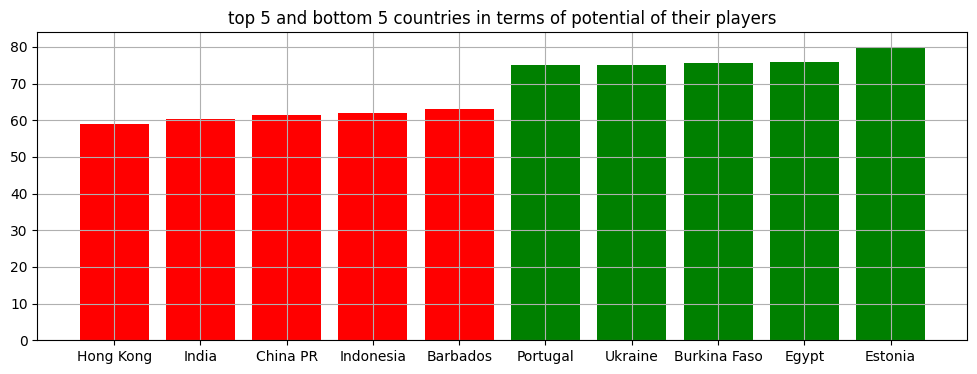

In [47]:
data = pd.concat([bottom5, top5], axis = 0).sort_values("potential")
data["color"] = ["red" if _potential < 70 else "green" for _potential in data["potential"]]

fig = plt.figure(figsize = (12,4))
plt.bar(data["nationality_name"], data["potential"], color = data["color"])
plt.grid(True)
plt.title("top 5 and bottom 5 countries in terms of potential of their players")
plt.show()

## Conclusion: best prodigy players mainly comes from Europe : Portugal, Ukraine, Estonia. Worst prodigies comes from Asia.

## Q : which player over 75 overall points have most balances = less difference between each skills points and vice versa?

In [48]:
skills_list = ["pace", "shooting", "passing", "dribbling", "defending", "physic", "defending_sliding_tackle", "skill_moves","weak_foot_points"]
question3 = pd.concat([skills[skills_list],player_name[["short_name"]], skills[["overall"]]], axis = 1)
question3 = question3[question3["overall"]  > 75 ]
question3_before_norm = question3

* check for Nan values and remove them

In [49]:
for _skill in skills_list:
    print(f"{_skill} number of NaN values : {question3[_skill].isnull().sum()}")

pace number of NaN values : 157
shooting number of NaN values : 157
passing number of NaN values : 157
dribbling number of NaN values : 157
defending number of NaN values : 157
physic number of NaN values : 157
defending_sliding_tackle number of NaN values : 0
skill_moves number of NaN values : 0
weak_foot_points number of NaN values : 0


In [50]:
question3 = question3[question3["pace"].notna()]

* due to diffrences in scales between skills like dribblind and weak foot I performed normalization

In [51]:
def normalization(_col):
    _min = _col.min()
    _max = _col.max()
    return (_col - _min) / (_max - _min)

# Assuming skills_list contains column names
for _skill in skills_list:
    question3.loc[:, _skill] = normalization(question3[_skill])

question3.loc[:, "diff"] = abs(question3[skills_list].min(axis=1) - question3[skills_list].max(axis=1))

most_balanced_player = question3.sort_values("diff", ascending=True).head(1)
less_balanced_player = question3.sort_values("diff", ascending=False).head(1)


/tmp/ipykernel_18/2090535794.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16049383 0.09876543 0.16049383 ... 0.62962963 0.74074074 0.82716049]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  question3.loc[:, _skill] = normalization(question3[_skill])
/tmp/ipykernel_18/2090535794.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.66666667 0.66666667 1.         ... 0.33333333 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  question3.loc[:, _skill] = normalization(question3[_skill])
/tmp/ipykernel_18/2090535794.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.75 0.75 0.75 ... 0.5  0.5  0.25]' has dtype incompatible with int64, please explicitly cast to

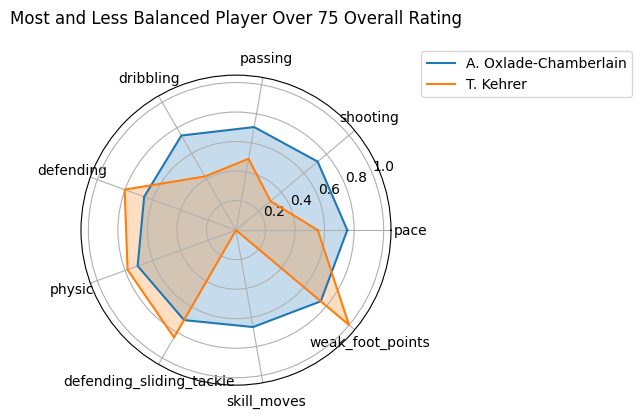

In [52]:
attributes = skills_list
most_balanced_player_values = most_balanced_player[skills_list].iloc[0, : ].tolist()
less_balanced_player_values = less_balanced_player[skills_list].iloc[0, : ].tolist()

name_most_balanced = most_balanced_player["short_name"].iloc[0]
name_less_balanced = less_balanced_player["short_name"].iloc[0]

fig, ax = plt.subplots(figsize=(4, 6), subplot_kw=dict(polar=True))

num_vars = len(attributes)

angles = np.linspace(0,2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[0:1]


most_balanced_player_values += most_balanced_player_values[:1]
less_balanced_player_values += less_balanced_player_values[:1]

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)


ax.plot(angles, most_balanced_player_values, label=name_most_balanced)
ax.fill(angles, most_balanced_player_values, alpha=0.25)

ax.plot(angles, less_balanced_player_values, label=name_less_balanced)
ax.fill(angles, less_balanced_player_values, alpha=0.25)

ax.legend(loc='upper right', bbox_to_anchor=(1.8, 1.1))
plt.title("Most and Less Balanced Player Over 75 Overall Rating", loc='center', pad=20)

plt.show()

## Conclusion : biggest differences are present in defending_sliding_tackle, smallest diffrences in defending and physics

## Q : Does club joined date = days in club affect on player overall? Compare with low tier and high tier league

In [53]:
club["club_joined"].isnull().value_counts()
club = club[club["club_joined"].notna()]

In [54]:
from datetime import datetime

days_diff = []
days_join = club["club_joined"].tolist()
date_current = "2014-07-01"

for date_n in days_join:
        diff = abs(datetime.strptime(date_current, "%Y-%m-%d") - datetime.strptime(date_n, "%Y-%m-%d"))
        days_diff.append(diff.days)


In [55]:
club["days_diff"] = days_diff

In [56]:
club["club_joined"] = pd.to_datetime(club["club_joined"])

In [57]:
club["year"] = club["club_joined"].dt.year
club["month"] = club["club_joined"].dt.month
club["day"] = club["club_joined"].dt.day

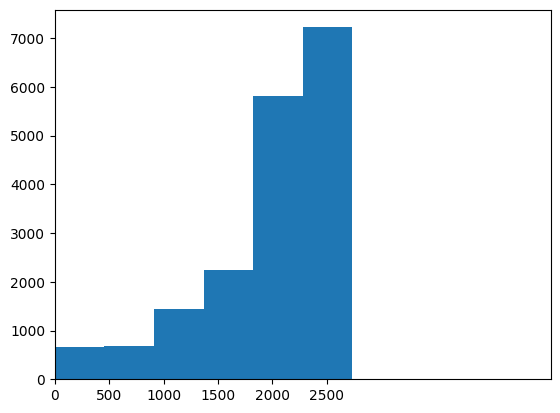

In [58]:
plt.hist(club["days_diff"])
plt.xticks(range(0,3000,500))
plt.xlim(club["days_diff"].min(), club["days_diff"].max())
plt.show()

In [59]:
club["league_name"].value_counts().sort_values(ascending = False)[0:15]

league_name
USA Major League Soccer          747
English League Championship      668
Argentina Primera División       652
English Premier League           632
Spain Primera Division           588
Japanese J. League Division 1    568
Spanish Segunda División         552
English League One               549
English League Two               544
French Ligue 1                   538
German 1. Bundesliga             524
German 3. Bundesliga             513
Turkish Süper Lig                498
French Ligue 2                   497
Polish T-Mobile Ekstraklasa      485
Name: count, dtype: int64

In [60]:
question4 = club.join(skills.set_index("sofifa_id"), how = "inner",  on='sofifa_id')[["days_diff", "overall", "league_name"]]

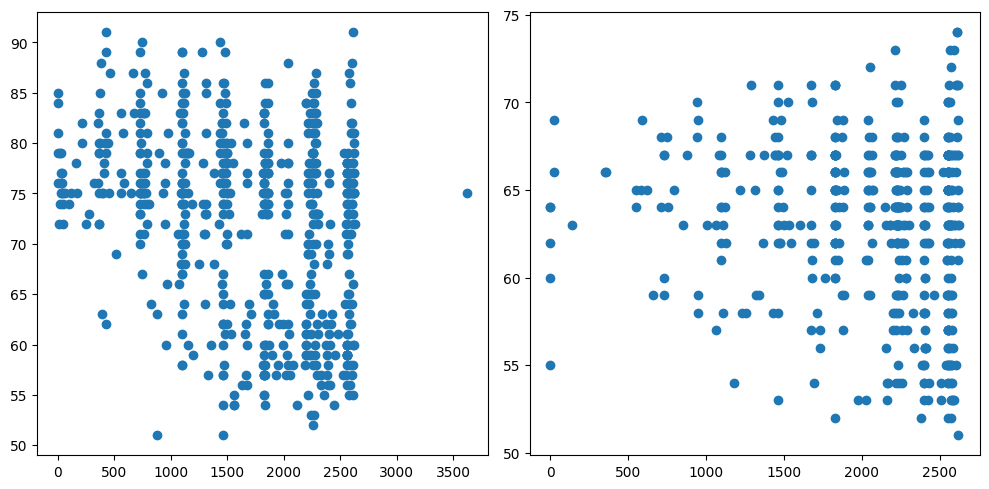

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

premier_league = question4[question4["league_name"] == "English Premier League"]
Ekstraklasa = question4[question4["league_name"] == "Polish T-Mobile Ekstraklasa"]

axes[0].scatter(premier_league["days_diff"], premier_league["overall"])
axes[1].scatter(Ekstraklasa["days_diff"], Ekstraklasa["overall"])

plt.tight_layout()
plt.show()

## Consclusion : premier league has more young players with fresh contracts and high overall scores, ekstraklasa has lot more long term players 

## Q:  In table format describe top 5 and bottom 5 clubs from premier league in terms of work_rate and compare their finances

In [62]:
question5 = skills.join(club.set_index("sofifa_id"), how = "inner", on = "sofifa_id")
question5 = question5.join(player_finance.set_index("sofifa_id"), how="inner", on="sofifa_id")
question5 = question5[question5["league_name"].isin(["English Premier League"])]
question5["work_rate"] = question5["work_rate"].str.split("/", expand = True)[0]
mapping = {"High" : 3, "Medium" : 2, "Low" : 1}
question5["work_rate"] = question5["work_rate"].map(mapping)
cols = list(question5.columns[question5.columns.str.contains("eur")]) + ["work_rate", "club_name"]
question5 = question5[cols]
question5_grouped = question5.groupby("club_name").agg({
    'wage_k_eur': 'mean',
    'release_clause_mln_eur': 'mean',
    'value_mln_eur': 'sum',
    'work_rate': 'mean'
}).reset_index().sort_values("work_rate", ascending = False)
pd.concat([question5_grouped.head(5), question5_grouped.tail(5)])

,club_name,wage_k_eur,release_clause_mln_eur,value_mln_eur,work_rate
11,Manchester City,112.825000,78.485375,1299.510,2.531250
8,Leeds United,37.529032,17.977419,274.950,2.516129
12,Manchester United,103.242424,58.713576,1008.730,2.484848
14,Norwich City,18.100000,9.058767,124.640,2.433333
16,Tottenham Hotspur,63.935484,41.306452,653.100,2.419355
17,Watford,29.740741,9.241926,122.225,2.222222
19,Wolverhampton Wanderers,41.290323,19.142194,297.080,2.161290
5,Chelsea,90.937500,53.985219,894.650,2.093750
4,Burnley,22.454545,10.967758,184.850,2.090909
13,Newcastle United,25.812500,11.623281,187.475,2.062500


## Q : Is there a correlation between work rate and club worth?

In [63]:
corr = question5['work_rate'].corr(question5['value_mln_eur'], method='pearson')
print(f"correlation between work rate and club worth : {round(corr, 3)}, thats means there is little positive correlation")

correlation between work rate and club worth : 0.196, thats means there is little positive correlation


/tmp/ipykernel_18/3136070379.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.text(float(question5_grouped[question5_grouped["club_name"] == club_]["work_rate"]) + 0.005, float(question5_grouped[question5_grouped["club_name"] == club_]["value_mln_eur"]),


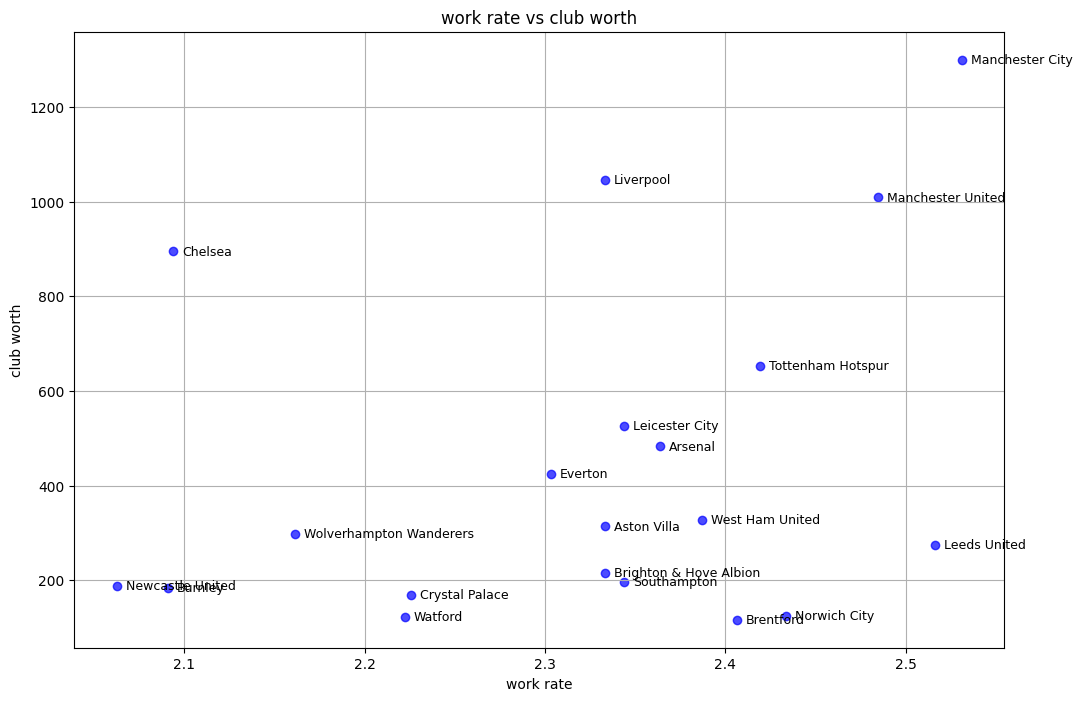

In [64]:
plt.figure(figsize=(12, 8))
plt.scatter(question5_grouped['work_rate'], question5_grouped['value_mln_eur'], marker='o', color='blue', alpha=0.7)

for i, club_ in enumerate(question5_grouped['club_name']):
    plt.text(float(question5_grouped[question5_grouped["club_name"] == club_]["work_rate"]) + 0.005, float(question5_grouped[question5_grouped["club_name"] == club_]["value_mln_eur"]), 
             club_, fontsize=9, ha='left', va='center')

plt.title('work rate vs club worth')
plt.ylabel('club worth')
plt.xlabel('work rate')
plt.grid(True)

plt.show()

## Conclusion: Manchester City has biggest work rate along with biggest wage and value.  Chelsea, despite being one of the best teams, have an inappropriately low work rate, unlike Leeds United

## Q : Which nationality contains most players who plays with each other in the same club?

In [65]:
question7 = player_international.join(club.set_index("sofifa_id"), how = "inner", on= "sofifa_id")[["nationality_name", "club_name"]]
question7_grouped = question7.groupby(["club_name", "nationality_name"]).agg({
    'nationality_name': 'count'
}).rename(columns={'nationality_name': 'count_max'}).reset_index()
question7_grouped = question7_grouped.loc[question7_grouped.groupby("club_name")['count_max'].idxmax()]
club_counts = question7["club_name"].value_counts().reset_index()
club_counts.columns = ['club_name', 'count']
question7 = question7_grouped.join(club_counts.set_index("club_name"), how = "inner", on = "club_name")
question7["percentage"] =  100 * (question7["count_max"] / question7["count"] )
question7 = question7.sort_values("percentage", ascending = False)
pd.concat([question7.head(5), question7.tail(5)])

,club_name,nationality_name,count_max,count,percentage
950,Ceará Sporting Club,Brazil,20,20,100.000000
4587,São Paulo,Brazil,20,20,100.000000
2133,Fortaleza,Brazil,20,20,100.000000
4417,Sport Club Corinthians Paulista,Brazil,20,20,100.000000
2334,Grêmio,Brazil,20,20,100.000000
752,Brentford,Denmark,7,32,21.875000
3446,PAOK,Greece,6,28,21.428571
1883,FC Red Bull Salzburg,Austria,6,28,21.428571
2820,LOSC Lille,France,6,29,20.689655
4774,Udinese Calcio,Brazil,3,22,13.636364


## Conclusion : Brazilians clubs lead in most homogeneous nationalities, lowest percentages approximetly 20 %

## Q : Which leagues gather most market value in players?

In [66]:
question8 = club.join(player_finance.set_index('sofifa_id'), on='sofifa_id')
question8 = question8[["league_name", "value_mln_eur"]]
question8_grouped = question8.groupby("league_name")["value_mln_eur"].sum().reset_index().sort_values(by = ["value_mln_eur"], ascending = False)
question8_grouped_top4 = question8_grouped.head(4)
question8_grouped_others = question8_grouped.drop(question8_grouped_top4.index)

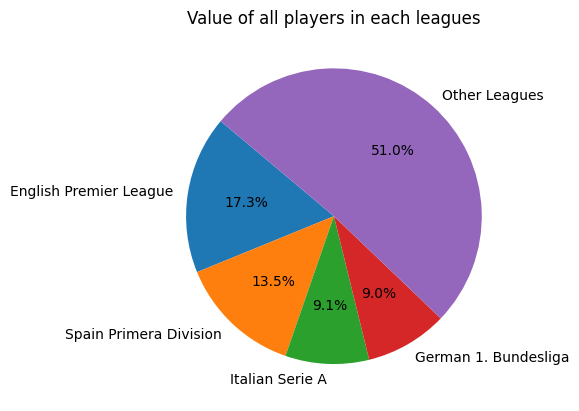

In [67]:
leagues = list(question8_grouped_top4["league_name"].unique())
value_mln_eur = list(question8_grouped_top4["value_mln_eur"].unique())

leagues.append("Other Leagues")
value_mln_eur.append(question8_grouped_others["value_mln_eur"].sum())

plt.pie(value_mln_eur, labels=leagues, autopct='%1.1f%%', startangle=140)
plt.title("Value of all players in each leagues")
plt.show()

## Conclusion : Big part of the market value (49%) belongs to 4 leagues : Bundesliga, Serie A, Primera Division and Premier League